In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay

In [18]:
df = pd.read_csv('wdbc.txt')
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [19]:
# Loading data
features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
            'compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean',
            'radius_se','texture_se','perimeter_se','area_se','smoothness_se',
            'compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se',
            'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
            'compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst']

column_names = ['ID', 'Diagnosis'] + features
breast_cancer_df = pd.read_csv('wdbc.txt', header=None, names=column_names)
breast_cancer_df.drop('ID', axis=1, inplace=True)

# Turn target into binary
breast_cancer_df['Diagnosis'] = breast_cancer_df['Diagnosis'].map({'M': 1, 'B': 0})

In [20]:
#Here we're checking if the data did load correctly
breast_cancer_df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### EDA

In [21]:
# Check if the shape matches the ones specified in the dataset description

#5. Number of instances: 569 
#6. Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
# It's one less because the ID column was dripped
breast_cancer_df.shape

(569, 31)

In [22]:
# Check the general structure of the data
#All seems to be continous data except for the target variable
#The null count also checks with what was said in the description: "Missing attribute values: none"
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [23]:
# Here we're just gonna double check the null values
breast_cancer_df.isnull().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [24]:
#Now we'll get the basic descriptive statistics of the df
breast_cancer_df.describe()
#The count shows all have the same number of non-null entries
#The min, max, and average shows that every feature has a different scale -> we will need to standardize it
# Generally speaking the std seems a little high... like in radius mean, texture_mean, perimiter_mean, etc. 

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<Axes: xlabel='Diagnosis'>

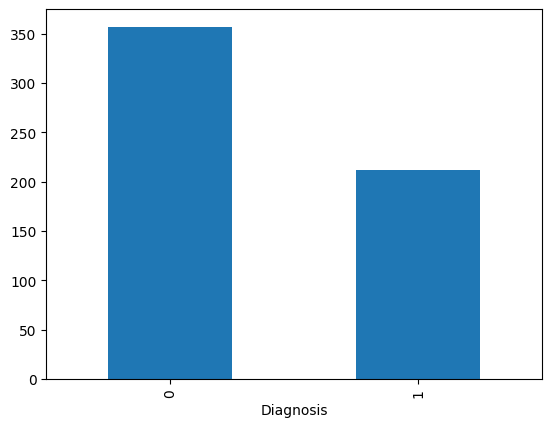

In [25]:
#Now lets see how balanced the target variable is
breast_cancer_df['Diagnosis'].value_counts().plot(kind='bar')

#This shows that the distribution is not great, but it's what we have to work with

In [26]:
#Here just to check it as a ratio
breast_cancer_df['Diagnosis'].value_counts(normalize=True)

#So around 63% of the entries are for benign
# For this type of dataset having more benign cases makes sense since there should be more healthy people
# On the other hand, having a lower number of entries for malignant cases could make it harder for the model to find the patterns
# So later on this could mean the model might be biased towards benign predictions
# I'm thinking that when doing the partitioning we should stratify to make it fair in the train and test sets

Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64

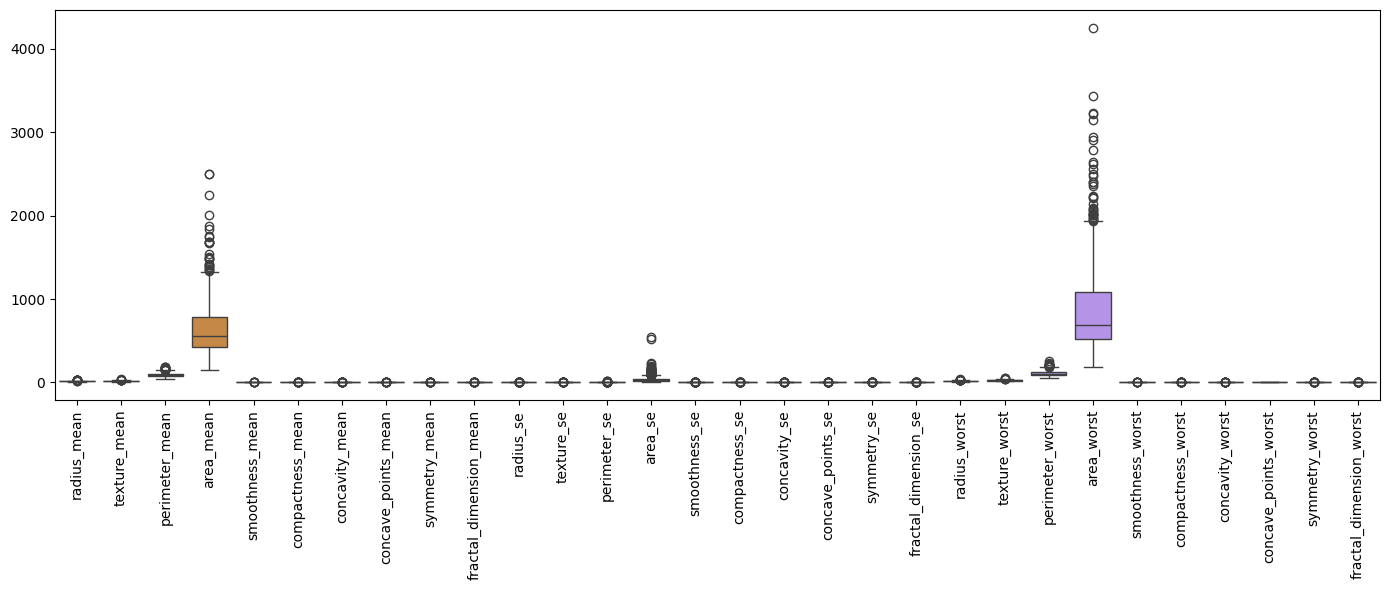

In [33]:
# Now to make more clear the data distrbution, boxplots are useful so:
plt.figure(figsize=(14, 6))
sns.boxplot(breast_cancer_df[features])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#With this we can see that area has the highest range in mean, standard error and in worst values
# The only one wiht no outliers is concave poinst worst
# Its a good thing that the standard error do look more centered

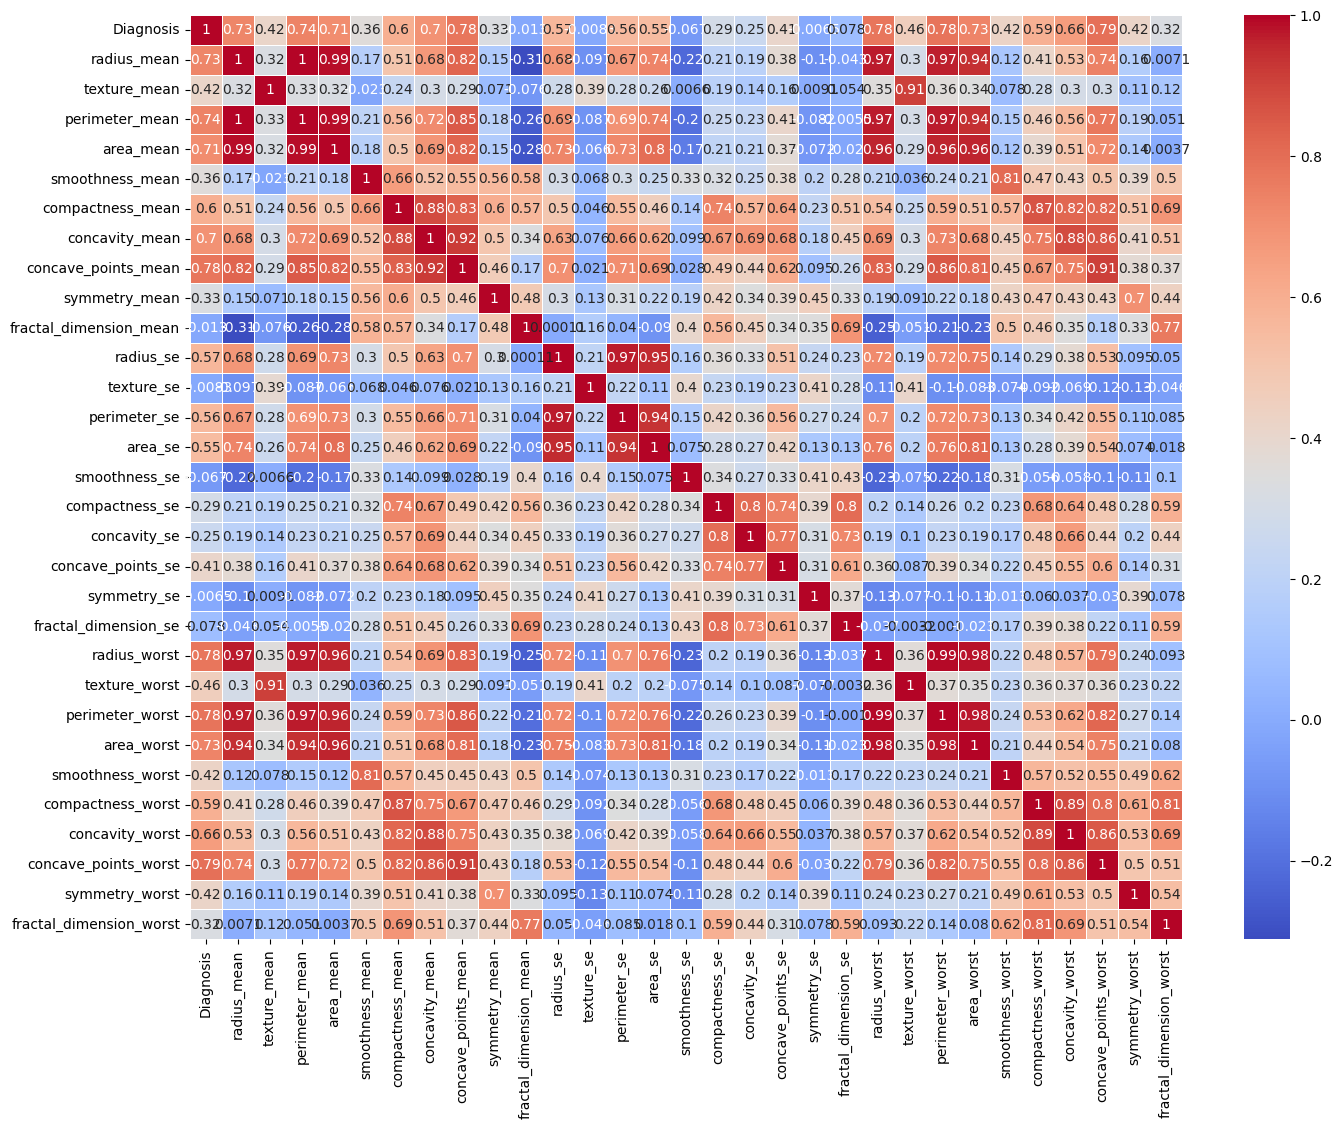

In [46]:
#now lets make a correlation heatmap to see the relationships between target, features and geatures vs themselves
corr = breast_cancer_df.corr()

# Plot
plt.figure(figsize=(16, 12))
sns.heatmap(corr, cmap="coolwarm",linewidths=0.5, annot=True)
plt.show()

# The graph shows that the correlation between features and the diagnosis is not very high... radius worst, permiter worst and area worst look like at 0.7
# The problem here is that there is high correlation between features themselves. It's obvious for radius, perimeter and area since they are mathematically related
# There are a few variables that show negative correlation with the target fractal_dimnsion_mean, smoothness_se, etc.
# Before making the model, I will delete variables that are highly correlate
# Also, I'll use some that are possitevily correlated with the target and some negatively correlated

Im keeping here to have in mind what to select based on biological reasons and statistical ones.
<br><br>
The database descriptions of the features:
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

In [47]:
# The features that i selected were:
selected_features = [
    #This one had one of the highest positive correlations
    #The concave points could speak about the cell structure as amourphous cells are more likely to be cancerous
    'concave_points_mean',
    # Knowing about the general size is important, so this one showed one of the highest values
    # The others related to area and radius will be dropped because of multicollinearity
    'perimeter_mean',
    # The correlation is not great, but this also refers to cell structure iregularities so its good to consider it
    # This will be related to the others, but I will keep it anyway
    'concavity_mean',
    # This on is to add a negative correlation and seems to now be related to the other ones that much
    'smoothness_se',
    #This one has a meh correlation but this should capture other structural details from the cells
    # I like it since it doesn't have to do much with the other features
    'texture_mean',
    #Finally, this one doesn't have a great correlation either, but it adds more information about the cell structure
    # This could be related to the target variable similarly to the concave points 
    'symmetry_mean'
]

In [ ]:
# Final Feature Selection
features = breast_cancer_df[selected_features]
target = breast_cancer_df['Diagnosis']

### First you should divide the sets of data

In [52]:

X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size=0.30,
    shuffle=True,
    stratify=target, # I added this because of the inbalance
    random_state=42
)

### Now standardize the features

In [53]:
#Make te scaler
scaler = StandardScaler()

# Fit the scaler only on the train data
scaler.fit(X_train)

#Now standardize the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Now work with the actual model

In [57]:
#Make the model
model = MLPClassifier(random_state=42)

#Train the model
model.fit(X_train_scaled, y_train)

#make the predictions for train and test
y_train_pred = model.predict(X_train_scaled)
y_test_pred  = model.predict(X_test_scaled)

#Now make the accuracy, kappa and confusion matrix for both
#Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy  = accuracy_score(y_test, y_test_pred)

#Kappa
train_kappa = cohen_kappa_score(y_train, y_train_pred)
test_kappa  = cohen_kappa_score(y_test, y_test_pred)

#Confusion Matrix
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm  = confusion_matrix(y_test, y_test_pred)

#Print the results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy:     {test_accuracy}\n")

print(f"Training Kappa:    {train_kappa}")
print(f"Test Kappa:        {test_kappa}\n")

print("Training Confusion Matrix:")
print(train_cm)

print("\nTest Confusion Matrix:")
print(test_cm)


Training Accuracy: 0.9472361809045227
Test Accuracy:     0.9415204678362573

Training Kappa:    0.886585067983825
Test Kappa:        0.8743570903747244

Training Confusion Matrix:
[[241   9]
 [ 12 136]]

Test Confusion Matrix:
[[103   4]
 [  6  58]]


c:\Users\kracr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Generally speaking, the default model seemed to do okay.<br><br>
Accuracy shows how good the model was at getting the predictions right. A 95% in training set and 94% in test set is great (The model predicted right 95% of the times). The accuracy of the training and test were consistent, and the values weren't exactly so overfitting doesn't seem like an issue. Since the training and test got a similar partition of malignant vs benign cancers, this means that the model is also generalizing well data it didn't know about directly.
<br><br>
Cohen's kappa is a measurement of how good is the model compared to random guessing (in this case 50/50 chance). Since both got over 0.8, this is a good measurement saying that it is reliable and it is better than guessing.  The model agrees most of the time with the actual labels c:
<br><br>
Last, the confusion matrix shows how the model predictions performed in like "counting" meaning. It shows the True Positives (p:positive, e:positive), True Negative (p:negative, e:negative), False Positive (p:positive, e:negative), and False Negative (p:negative, e:positive). In this cancer prediction situation the most important thing is to have close to none False Negatives. It is better that a patient that DIDN'T have cancer gets treated (False Positive) than a patienta that DID have cancer doesn't get treated (False Negative). Taking this into account. The True Positives and True Negatives happened most of the times so its great. Interestingly enough, the test set did better on both False Positives and False Negatives (which is great).


### Lets try to make the best model c:

In [ ]:
# I asked chatGPT what parameters it thought were the most important
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50,50), (100,50), (50,50,50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ["constant", "adaptive"]
}

#Make another model
mlp = MLPClassifier(max_iter=500, random_state=42)

#Do the grid search
grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

#Fit th grid
grid.fit(X_train_scaled, y_train)

#Show the best one
print("Best Hyperparameters:")
print(grid.best_params_)
print("\nBest Cross-Validation Accuracy:")
print(grid.best_score_)

Best Hyperparameters:
{'activation': 'relu', 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant'}

Best Cross-Validation Accuracy:
0.9446835443037976


The best hyper parameters where:
- activation = relu
- hidden_layers_sizes = 50 50 50 (3 layers each with 50 neurons)
- learning_rate = constant

In [ ]:

#this is repeatin gthe steps before just to show the same values
best_mlp = grid.best_estimator_

y_train_pred_gs = best_mlp.predict(X_train_scaled)
y_test_pred_gs  = best_mlp.predict(X_test_scaled)

print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred_gs))
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred_gs))

print("\nTrain Kappa:", cohen_kappa_score(y_train, y_train_pred_gs))
print("Test Kappa: ", cohen_kappa_score(y_test, y_test_pred_gs))


Train Accuracy: 1.0
Test Accuracy:  0.9298245614035088

Train Kappa: 1.0
Test Kappa:  0.8482697426796806


As you can see the both the train accuracy and kappa accuracy increased to 1. This makes it comparably better in the training set, but it might be it got to know the data a little too well. But then the test accuracy wasn't bad either, and it shows no overfitting since it would've gotten 100% with the test data set too.